<a href="https://colab.research.google.com/github/Edesak/tensorflow-kurz/blob/main/02_neural_network_clasification_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod do klasifikacnich neuronovych sitich pomoci tensorflow

* Binary
  * Klasifikace znamena ze se NN musi rozhodout binarne (Ano, Ne napr. Ano je zprava spam, Ne neni zprava spam).
* Multiclass
  * Dalsi uziti klasifikace je multiclass. To jest rozpoznani obrazku nebo dat a prirazeni je do urcite kategorie classy. (Musi se rozhodnout zda je na obrazku sushi,steak nebo pizza )
* Multilabel
  * Dalsi odvetvy je Multilabel. Kdy jeden obrazek muze byt oznacen vicero veci (tagy/labely). Napriklad ze na obrazku je Pizza a zaroven steak. Nebo Pizza a ananas. 

##Udelat si data a fit 
(jen experiment nez se dostaneme na skutecna data.)
Udelame si 1000 kousku v datasetu

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

#Udelame kolecka jakozto priklad datasetu
x,y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 42)

In [ ]:
x[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Tezke porozumet v tehle podobe

In [ ]:
import pandas as pd

#{"label", data ktere zobrazit [radek,sloupec]}
circles = pd.DataFrame({"X0":x[:,0], "X1": x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


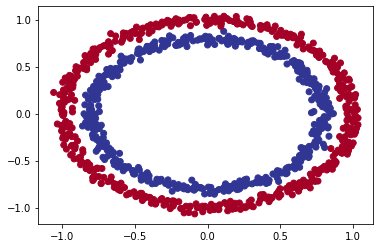

In [ ]:
#Vizualizace pomoci plotu 

import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Musime zkontrolovat tvary/rozmery

Musime zjistit v jakych rozmerech nam prisel dataset

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x[42],y[42]

(array([-0.71424251, -0.67921777]), 0)

##Kroky v modelovani

In [ ]:
x_train = x[:800,:]
y_train = y[:800]

x_test = x[800:]
y_test = y[800:]


In [ ]:
x_train[0].shape

(2,)

Bez aktivacnich funkci, je tento model marny ma 50% uspecnost coz je jako by hadal. 

In [ ]:
#Udelani modelu
import tensorflow as tf

tf.random.set_seed(42)

model_1_circle = tf.keras.models.Sequential([
                                             #tf.keras.layers.InputLayer(input_shape=(2)),
                                             #tf.keras.layers.Dense(100,activation="relu"),
                                             tf.keras.layers.Dense(10, activation="relu"),
                                             tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_1_circle.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

history = model_1_circle.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.4700
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.3600
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4112
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5537
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5400
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5525
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.5788
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6513
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.7375
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6562
Epoch 11/

In [ ]:
model_1_circle.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000


[0.03279884159564972, 1.0]

Vizualizace predikce na spatnem modelu 

In [ ]:
tf.random.set_seed(42)

model_2_circle_bad = tf.keras.models.Sequential([
                                             #tf.keras.layers.InputLayer(input_shape=(2)),
                                             tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                             tf.keras.layers.Dense(1)
])

model_2_circle_bad.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

history = model_2_circle_bad.fit(x_train,y_train,epochs=100,verbose = 0)

In [ ]:
model_2_circle_bad.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4250


[0.6975390911102295, 0.42500001192092896]

In [ ]:
import numpy as np

In [ ]:


def plot_desision(model,x,y):
  """
  Plot, ktery zobrazuje hranice predikce, ktery urcuje model
  """

  x_min,x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1 
  y_min,y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()] #Ravel prehodi do 1D a c_ je hodi dohromady do 2D 

  y_pred = model.predict(x_in)

  #multiclass
  if len(y_pred[0])>1:
    print("multiclass predikce")
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else: 
    print("Binary predikce")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, apltha = 0.7 )
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

Binary predikce


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'apltha'


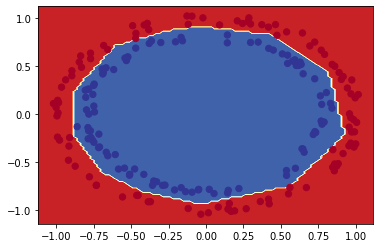

In [ ]:
plot_desision(model_1_circle,x_test,y_test)

In [ ]:
 x_min,x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1 
 x_min,x_max

(-1.1595024599098636, 1.1337117525463374)

In [ ]:
y_min,y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
y_min,y_max

(-1.1677683182718437, 1.1360036756154805)

In [ ]:
xx , yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [ ]:
x_in = np.c_[xx.ravel(),yy.ravel()]
x_in, xx.ravel()

(array([[-1.15950246, -1.16776832],
        [-1.13633868, -1.16776832],
        [-1.1131749 , -1.16776832],
        ...,
        [ 1.08738419,  1.13600368],
        [ 1.11054797,  1.13600368],
        [ 1.13371175,  1.13600368]]),
 array([-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]))

In [ ]:
x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)

x_reg_train = x_reg[:150]
y_reg_train = y_reg[:150]

x_reg_test = x_reg[150:]
y_reg_test = y_reg[150:]

np.shape(x_reg_test),np.shape(x_reg_train)


(TensorShape([50]), TensorShape([150]))

In [ ]:
import tensorflow as tf

Na tyto data musime pouzit loss jiny jelikoz se jedna o regesion data

In [ ]:
tf.random.set_seed(42)

model_regresion = tf.keras.models.Sequential([
                                              tf.keras.layers.Dense(100),
                                              tf.keras.layers.Dense(10),
                                              tf.keras.layers.Dense(1)
])

model_regresion.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

model_regresion.fit(x_reg_train,y_reg_train,epochs = 100)


Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

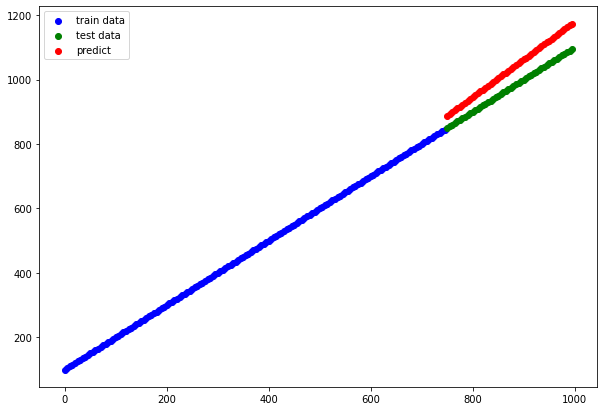

In [ ]:
y_reg_predict = model_regresion.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label = "train data")
plt.scatter(x_reg_test,y_reg_test,c="g",label = "test data")
plt.scatter(x_reg_test,y_reg_predict, c="r",label = "predict")
plt.legend()

In [ ]:
tf.random.set_seed(42)

model_3_circle_edu = tf.keras.models.Sequential([
                                                 tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_3_circle_edu.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

history = model_3_circle_edu.fit(x_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2511 - accuracy: 0.4775
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1750 - accuracy: 0.4487
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0891 - accuracy: 0.4275
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9741 - accuracy: 0.4225
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9157 - accuracy: 0.4187
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8919 - accuracy: 0.4225
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8330 - accuracy: 0.4387
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8141 - accuracy: 0.4387
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8133 - accuracy: 0.4425
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8037 - accuracy: 0.4425
Epoch 11/

Binary predikce


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'apltha'


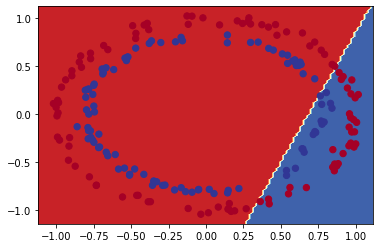

In [ ]:
plot_desision(model_3_circle_edu,x_test,y_test)

##Ukazani activacni fuknci 


In [ ]:
#Toy tensor

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

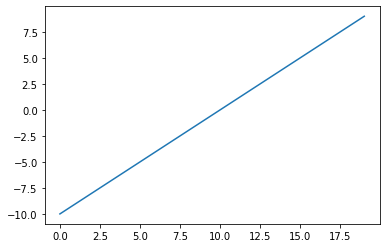

In [ ]:
#vizualizace

plt.plot(A)

In [ ]:
#replikace sigmoind fuknce sigmoid(x) = 1/(1+ exp(-x))

def sigmoid(x):
  return 1/(1+tf.exp(-x))

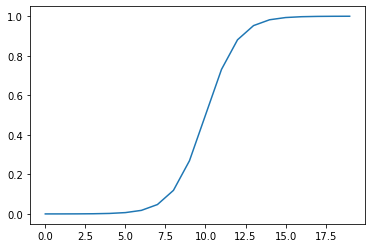

In [ ]:
plt.plot (sigmoid(A))


In [ ]:
#replikace ReLu funkce

def relu(x):
  return tf.maximum(0,x)

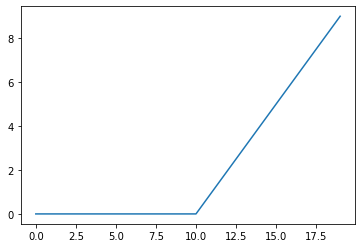

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

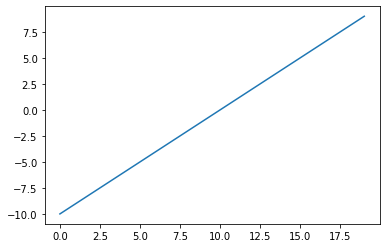

In [ ]:
plt.plot (tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Binary predikce


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'apltha'


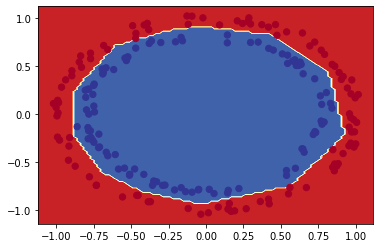

In [ ]:
plot_desision(model_1_circle,x_test,y_test)

##Plot loss curve

In [ ]:
#prevest history objekt na data frame

pd.DataFrame(history.history)

,loss,accuracy
0,4.251070,0.47750
1,4.174954,0.44875
2,4.089108,0.42750
3,3.974146,0.42250
4,3.915684,0.41875
...,...,...
95,2.361756,0.46875
96,2.320897,0.46875
97,2.313019,0.47000
98,2.296101,0.47000


<Figure size 1440x1440 with 0 Axes>

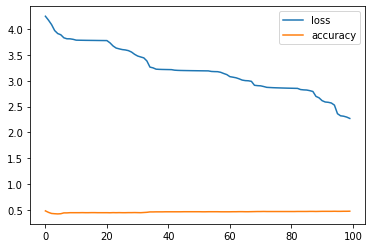

In [ ]:
plt.figure(figsize=(20,20))
pd.DataFrame(history.history).plot()

##Vyuziti loss curve na najiti vhodneho learning ratu pro optimizer
Najdeme idealni learning rate

* Learning rate callback

In [ ]:
tf.random.set_seed(42)

model_4_circle = tf.keras.models.Sequential([
                                             tf.keras.layers.Dense(4,activation="relu"),
                                             tf.keras.layers.Dense(4,activation="relu"),
                                             tf.keras.layers.Dense(1,activation="sigmoid")
])

model_4_circle.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)
#predtim nez zacneme trenovat nas callback uz musi existovat 

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_circ = model_4_circle.fit(x_train,
                                  y_train,
                                  epochs = 100)
                                  #callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/

[0.00011220184543019634, 0.00012589254117941674, 0.00014125375446227543, 0.00015848931924611136, 0.0001778279410038923, 0.00019952623149688796, 0.00022387211385683394, 0.000251188643150958, 0.0002818382931264454, 0.000316227766016838, 0.00035481338923357554, 0.00039810717055349724, 0.0004466835921509632, 0.0005011872336272722, 0.0005623413251903491, 0.0006309573444801934, 0.0007079457843841379, 0.0007943282347242816, 0.0008912509381337455, 0.001, 0.0011220184543019637, 0.0012589254117941675, 0.0014125375446227542, 0.0015848931924611134, 0.001778279410038923, 0.00199526231496888, 0.0022387211385683403, 0.0025118864315095794, 0.0028183829312644535, 0.0031622776601683794, 0.003548133892335755, 0.003981071705534973, 0.0044668359215096305, 0.005011872336272723, 0.005623413251903491, 0.006309573444801933, 0.007079457843841381, 0.007943282347242814, 0.008912509381337455, 0.01, 0.01122018454301963, 0.012589254117941677, 0.01412537544622754, 0.01584893192461114, 0.01778279410038923, 0.019952623

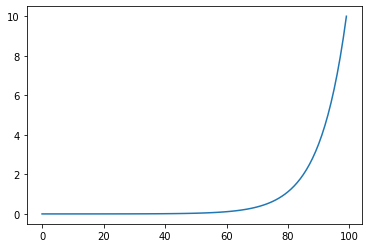

In [ ]:
lr = []
for x in range(1,101):
  lr.append(1e-4 * 10 **(x/20))

print(lr)
plt.plot(lr)

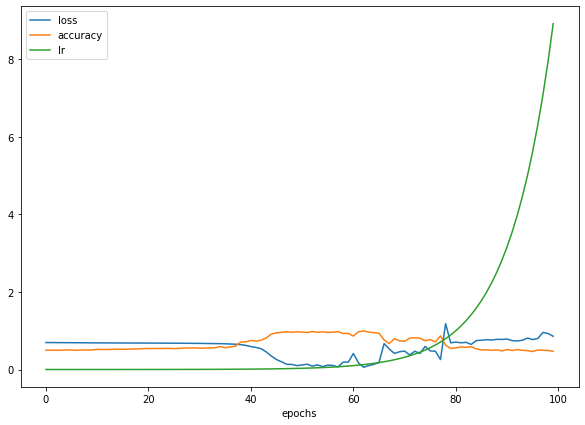

In [ ]:
pd.DataFrame(history_circ.history).plot(figsize = (10,7),xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

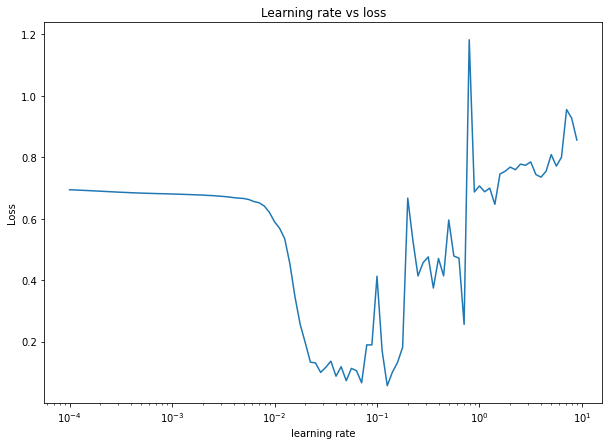

In [ ]:
#plot the lr vs loss

lrs = 1e-4 * (10**(tf.range(0,100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history_circ.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

Idealni learning rate je v nejnizsim bode a 10* mensi. Takze nejnizsi bod /10. Nekde mezi t2mito hodnotami je idelani leraning rate

In [ ]:
tf.random.set_seed(42)

model_5_circle = tf.keras.Sequential([
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5_circle.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0576),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

#loss_callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 0.04+epochs*0.0004)

history_zoom_5=model_5_circle.fit(x_train,
                   y_train,
                   epochs=20
                   #callbacks = [loss_callback]
                   )

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5587
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6463
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7575
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.9312
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9513
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9812
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9875
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9800
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9837
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9887
Epoch 11/20
25/25 [

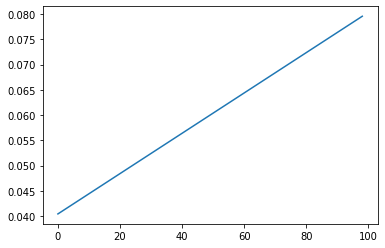

In [ ]:
plt.plot(0.04+tf.range(1,100,dtype=tf.float32)*0.0004)

In [ ]:
0.0004*100

0.04

In [ ]:
10**(-2)

0.01

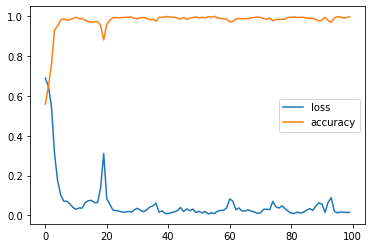

In [ ]:
pd.DataFrame(history_zoom_5.history).plot()

0.00727107236161828
44


0.0576

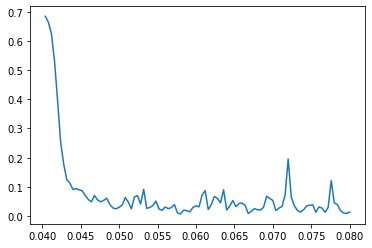

In [ ]:
plt.plot(0.04+tf.range(1,101,dtype=tf.float32)*0.0004,history_zoom_5.history["loss"])
print(np.min(history_zoom_5.history["loss"]))

print (np.argmin(history_zoom_5.history["loss"]))
0.04+44*0.0004

In [ ]:
tf.random.set_seed(42)

model_6_circle = tf.keras.models.Sequential([
                                             tf.keras.layers.Dense(4,activation="relu"),
                                             tf.keras.layers.Dense(4,activation="relu"),
                                             tf.keras.layers.Dense(1,activation="sigmoid")
])

model_6_circle.compile(
    optimizer = tf.keras.optimizers.Adam(0.02),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

history_6 = model_6_circle.fit(x_train,y_train,epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
model_6_circle.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [ ]:
model_5_circle.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8850


[0.3965466618537903, 0.8849999904632568]

In [ ]:
model_4_circle.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9950


[0.02450874261558056, 0.9950000047683716]

##Ukazani vzorku vedle sebe pomoci plt

Binary predikce


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'apltha'


Binary predikce


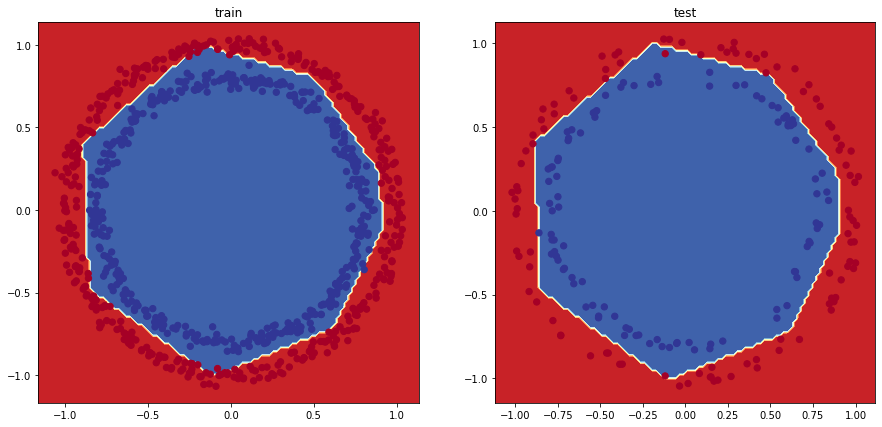

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1) #(rows,colums,section)
plt.title("train")
plot_desision(model_6_circle,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_desision(model_6_circle,x_test,y_test)
plt.show()

##Nejbeznejsi evaulace pro klasifikace (Bakalarka)

Jak zhodnotit jak je na tom nase sit. 

* tp - true positive
* tn - true negative
* fp - false positive
* fn - false negative
---
* Accuracy - vhodne na rozvnomerne rozdelene datasety
  * (tp + tn)/(tp+tn+fp+fn)
* Precision - Vetsi precision vede k mene falesne pozitivnich (nejsem nemocny, ale test ukazal ze jo)
  * (tp)/(tp+fp)
* Recall - vetsi recall vede k mene false negative (jsem nemocny , ale test to neukazal)
  * (tp)/(tp+fn)
* F1-score - Kombinace precision a recall dora metrika pro klasifikace
  * 2* (precis * recall)/(precis + recall)
* Confusion matrix - komplikovana kdyz mame hodne class
* Classification report(sklearn)- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
---
* Kdyz se snazime o vetsi precision tak se nam snizuje recall a naopak


In [ ]:
loss, accuracy = model_6_circle.evaluate(x_test,y_test)

print(f"Model loss: {loss}")
print(f"Model accuracy: {(accuracy *100):.2f} %")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss: 0.05740184709429741
Model accuracy: 99.00 %


Confusion matrix
<br>
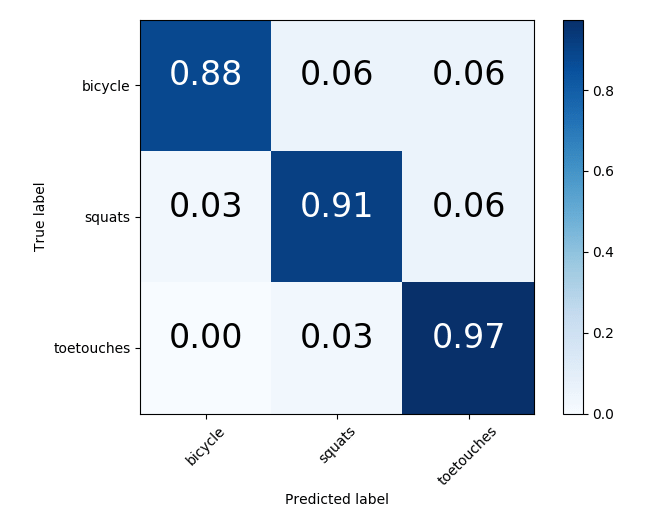

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_6_circle.predict(x_test)

confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [ ]:
y_test [:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds [:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
import itertools
def my_conf_matrix(y_true,y_pred,classes = None , figsize =(10,10),text_size = 15):

  """
  Udela graficky vystup jak dana neuronova si vede v predikcich
  Funguje prevazne s clasifikacnim modelem

  y_pred - musi byt v 1D array jinak to neumi (probs.argmax(axis=1))

  Prametry:
  * y_true - pravdive vysledky
  * y_pred - predikovane vysledky od Neuronove site
  * classes - nemusi se vyplnovat vyplni se pripadne samy (pokud jmena class tak predat list dostupnych class)
  * figsize - Jak velky bude obrazek
  * text_size - jak velke bude pismo

  Returns:
  * Confusion matrix with help of matplot
  """
  #Udelani confusion matice
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  #Udelani matice
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Pojmenovani axis

  ax.set(title = "Confusion matrix",
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  treshold = (cm.max() + cm.min())/2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment= "center",
            color = "white" if cm[i,j]>treshold else "black",
            size = text_size)

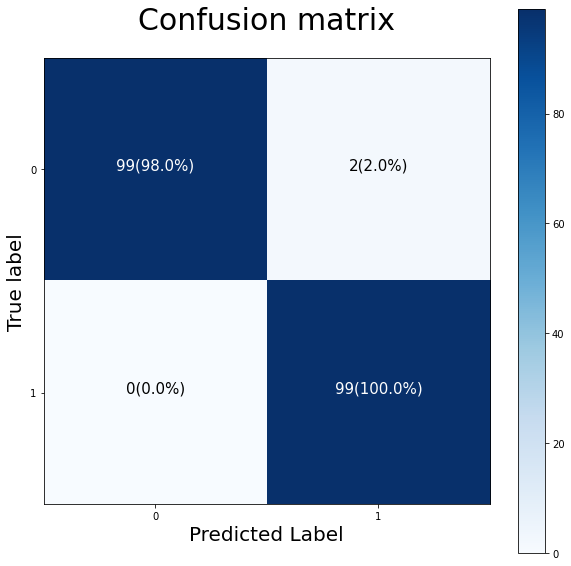

In [ ]:
my_conf_matrix(y_test,y_preds)

In [ ]:
n_classes

2

#Pracovani s vetsim datasetem (Zacatek multiclass casifikace)

Kdyz mame vice nez 2 moznosti povazuje se to multiclass klasifikaci

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Data jiz byly prebrany na test a train

(x_train_fashion,y_train_fashion),(x_test_fashion,y_test_fashion) = fashion_mnist.load_data() 

In [ ]:
x_train_fashion[0],y_train_fashion[0]

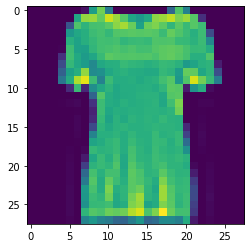

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_fashion[10])

In [ ]:
y_train_fashion[10]

0

In [ ]:
#Udelame list aby to bylo citelne co to je

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress" ,"Coat", "Sandal", "Shirt" ,"Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

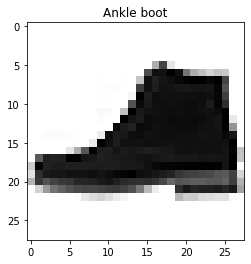

In [ ]:
index = 42
plt.imshow(x_train_fashion[index],cmap=plt.cm.binary)
plt.title(class_names[y_train_fashion[index]])

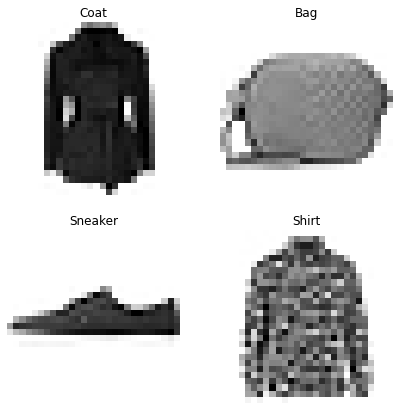

In [ ]:
#Plot multiple random images

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(x_train_fashion)))
  plt.imshow(x_train_fashion[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train_fashion[rand_index]])
  plt.axis(False)

##Udelani multiclass modelu

In [ ]:
x_train_fashion[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
#Input shape problems se da vyresit Flatten layer
flatten_model = tf.keras.models.Sequential([
                                            tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

* categorical_crossentropy - potrebuje one-hot encodovane labely
* sparse_categorical_crossentropy - dokaze pouzit i int classy, ktere nejsou one-hot encodovane

In [ ]:

tf.random.set_seed(42)

model_7_moda = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(4,activation="relu"),
                                    tf.keras.layers.Dense(4,activation="relu"),
                                    tf.keras.layers.Dense(10,activation="softmax")
])

model_7_moda.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ["accuracy"]
)


non_norm_history_moda = model_7_moda.fit(x_train_fashion,
                                    tf.one_hot(y_train_fashion,depth=10),
                                    epochs=10,
                                    validation_data=(x_test_fashion,tf.one_hot(y_test_fashion,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_7_moda.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_112 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_fashion_norm = tf.keras.utils.normalize(x_train_fashion)
x_test_fashion_norm = tf.keras.utils.normalize(x_test_fashion)

In [ ]:
tf.random.set_seed(42)

model_8_moda = tf.keras.models.Sequential([
                                           tf.keras.layers.Flatten(input_shape=(28,28)),
                                           tf.keras.layers.Dense(4,activation="relu"),
                                           tf.keras.layers.Dense(4,activation="relu"),
                                           tf.keras.layers.Dense(10,activation="softmax")
])

model_8_moda.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

history_moda = model_8_moda.fit(x_train_fashion_norm,
                                y_train_fashion,
                                epochs=10,
                                validation_data = (x_train_fashion_norm,
                                                   y_train_fashion))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0415 - accuracy: 0.6192 - val_loss: 0.6856 - val_accuracy: 0.7477
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6387 - accuracy: 0.7641 - val_loss: 0.6106 - val_accuracy: 0.7874
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5777 - accuracy: 0.7929 - val_loss: 0.5564 - val_accuracy: 0.8003
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5409 - accuracy: 0.8095 - val_loss: 0.5196 - val_accuracy: 0.8185
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5186 - accuracy: 0.8176 - val_loss: 0.5064 - val_accuracy: 0.8217
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5027 - accuracy: 0.8233 - val_loss: 0.4993 - val_accuracy: 0.8274
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4922 - accuracy: 0.8266 - val_loss: 0.4981 - val_accuracy:

In [ ]:
import pandas as pd

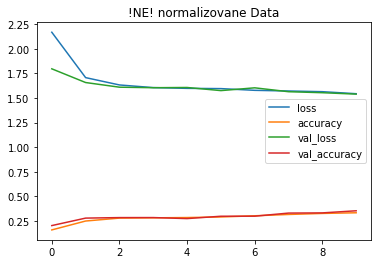

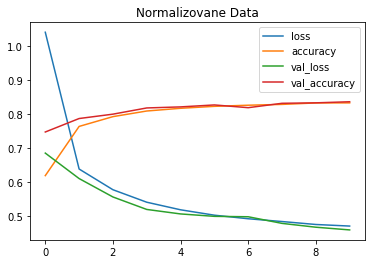

In [ ]:
pd.DataFrame(non_norm_history_moda.history).plot(title="!NE! normalizovane Data")
pd.DataFrame(history_moda.history).plot(title="Normalizovane Data")

##Idealni learning rate

Idealni learning rate je tam kde se nejvice snizi

In [ ]:
tf.random.set_seed(42)

model_9_moda = tf.keras.models.Sequential([
                                           tf.keras.layers.Flatten(input_shape = (28,28)),
                                           tf.keras.layers.Dense(4,activation="relu"),
                                           tf.keras.layers.Dense(4,activation="relu"),
                                           tf.keras.layers.Dense(10,activation="softmax")
])

model_9_moda.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20) )

history_moda_2 = model_9_moda.fit(x_train_fashion_norm,
                                  y_train_fashion,
                                  epochs = 40,
                                  validation_data = (x_test_fashion_norm,y_test_fashion),
                                  callbacks = [learning_rate_callback])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0415 - accuracy: 0.6192 - val_loss: 0.7083 - val_accuracy: 0.7392
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6358 - accuracy: 0.7655 - val_loss: 0.6342 - val_accuracy: 0.7777
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5710 - accuracy: 0.7958 - val_loss: 0.5833 - val_accuracy: 0.7924
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5315 - accuracy: 0.8141 - val_loss: 0.5505 - val_accuracy: 0.8117
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5097 - accuracy: 0.8187 - val_loss: 0.5430 - val_accuracy: 0.8079
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4940 - accuracy: 0.8253 - val_loss: 0.5409 - val_accuracy: 0.8130
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4845 - accuracy: 0.8288 - val_loss: 0.5229 - val_accuracy:

Text(0.5, 1.0, 'Najiti idealni learning rate')

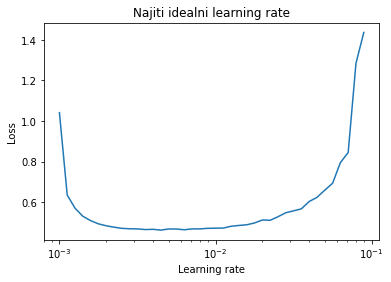

In [ ]:
#plot learning rate

import numpy as np
import matplotlib.pyplot as plt
from imp import reload

#Reload plt kvuli erroru s xlablem a podobnym
#Jakmile se nekde v notebooku zavola funkce xlabel a pak ji chce clovek zmenit musi reloadnout plt jinak haze error
reload(plt)

lrs = 1e-3 * 10 **(tf.range(40)/20)
plt.semilogx(lrs,history_moda_2.history["loss"])
plt.xlabel ("Learning rate")
plt.ylabel("Loss")
plt.title("Najiti idealni learning rate")

In [ ]:
10**-3


0.001

In [ ]:
#Zjistili jsme ze idealni learning rate je asi 0.001 coz je defaultni pro adama
#Jen pro cviceni to zopakujeme 

tf.random.set_seed(42)

model_10_moda = tf.keras.models.Sequential([
                                            tf.keras.layers.Flatten(input_shape = (28,28)),
                                            tf.keras.layers.Dense(4,activation="relu"),
                                            tf.keras.layers.Dense(4,activation="relu"),
                                            tf.keras.layers.Dense(10,activation="softmax")
])

model_10_moda.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ["accuracy"]

)

history_moda_3 = model_10_moda.fit(x_train_fashion_norm,
                                   y_train_fashion,
                                   epochs = 20,
                                   validation_data= (x_test_fashion_norm,y_test_fashion))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0415 - accuracy: 0.6192 - val_loss: 0.7083 - val_accuracy: 0.7392
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6387 - accuracy: 0.7641 - val_loss: 0.6406 - val_accuracy: 0.7735
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5777 - accuracy: 0.7929 - val_loss: 0.5891 - val_accuracy: 0.7903
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5409 - accuracy: 0.8095 - val_loss: 0.5570 - val_accuracy: 0.8064
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5186 - accuracy: 0.8176 - val_loss: 0.5446 - val_accuracy: 0.8091
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8233 - val_loss: 0.5407 - val_accuracy: 0.8129
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.8266 - val_loss: 0.5407 - val_accuracy:

##Evaluating multiclass model

In [ ]:
model_10_moda.evaluate(x_test_fashion_norm,y_test_fashion)

313/313 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.8245


[0.4925171434879303, 0.8245000243186951]

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs_moda = model_10_moda.predict(x_test_fashion_norm) #probs je zkracenina pro probability protoze nedostame vysledek jen pravdepodobnosti

print(y_probs_moda[0])
print(tf.argmax(y_probs_moda[0]))
print(class_names[tf.argmax(y_probs_moda[0])])


[1.2645184e-07 2.3504847e-22 2.9528947e-15 2.1511276e-08 5.3701080e-12
 6.3106857e-02 6.2285686e-08 1.3226567e-01 5.8085000e-04 8.0404639e-01]
tf.Tensor(9, shape=(), dtype=int64)
Ankle boot


In [ ]:
#Nezaokrouhluje, vraci pouze pozice coz je vlastne vysledek predikce. Na jake pozici je nejvetsi cislo tak je to predikce.
y_pred_moda = y_probs_moda.argmax(axis=1)
y_pred_moda[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

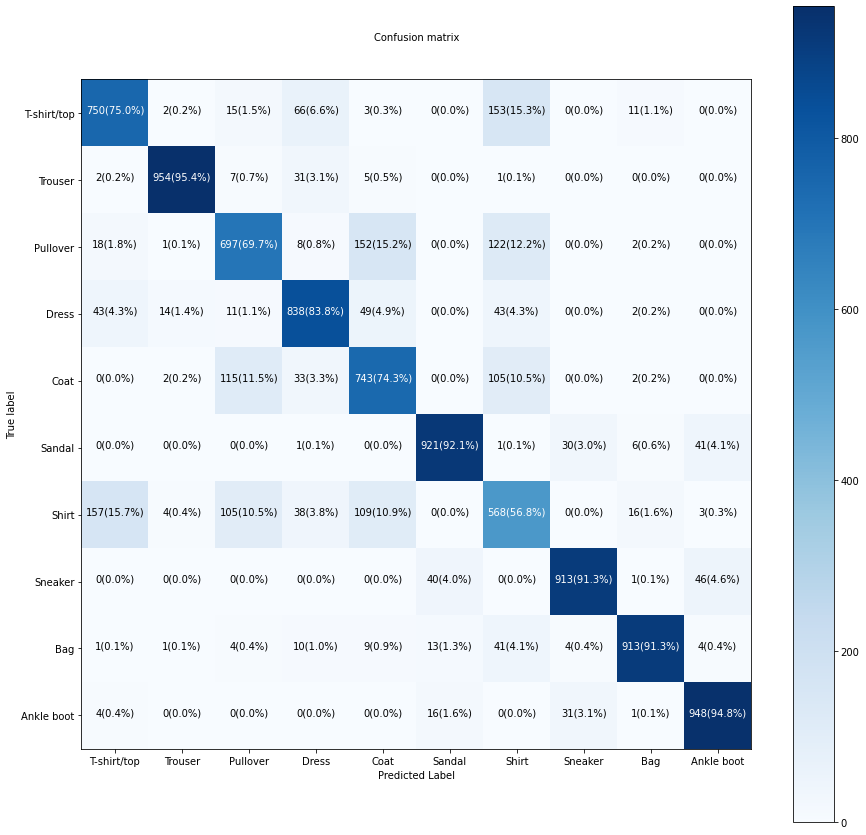

In [ ]:
my_conf_matrix(y_test_fashion,y_pred_moda,classes=class_names,figsize=(15,15),text_size=10)

##Plot_my_image

In [ ]:
import random

def plot_my_image(model,x_true, y_true, classes, img_shape = (1,28,28), cmap_s = plt.cm.binary, random_image = True, n = 0 , text_size = 10, by_class = False, index_of_class = 0):
  """
  Vybera nahodny obrazek a ukazeho s pravym a predikovanym nazvem

  Parametr random_image nefunguje s parametrem by_class (Jedno z nich musi byt Flase)
  Parametrs:
  * model - neuronovy model
  * x_true - Data
  * y_true - pravdivy nazev k fotkam
  * classes - list trid
  * img_shape - rozmer ibrazku, ktery se ma ukazovat (Deafaul: (1,28,28))
  * cmap_s - barevna paleta ve ktere se ma obrazek zobrazovat (Default: binary - Grey scale)
  * random - Pokud True zvoli nahodne fotku, kterou ohodnoti pokud False musi se definovat pozice n
  * n - voli snimek, ktery se ma zobrazit
  * by_class - Default: False. Pokud True tak vraci snimky jen danne kategorie. 
  * index_of_class - Urcuje kategorii. Musi byt int. 
  """
  #Nahodny obrazek
  if random_image and by_class == False:
    i = random.randint(0, len(x_true))
  elif (random_image and by_class):
    i = random.randint(0, len(np.where(y_true == index_of_class)))
  else:
    i = n
    if (i<=len(x_true) or i<=len(np.where(y_true == index_of_class))):
      None
    else:
      exit()
    

  if by_class == False:
  #Predikce a cile
    target_image = x_true [i]
    pred_probs = model.predict(target_image.reshape(img_shape))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[y_true[i]]

  else:
    index_cat = np.where(y_true == index_of_class)
    index_cat = np.array(index_cat)
    index_cat = np.squeeze(index_cat)
    target_image = x_true[index_cat[i]]
    pred_probs = model.predict(target_image.reshape(img_shape))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[y_true[index_cat[i]]]
  #Ukaze fotku
  plt.imshow(target_image, cmap=cmap_s)

  #Zmena titulku pokud je predikce spatne nebo spravne
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel(f"{pred_label} {100*tf.reduce_max(pred_probs):.2f}% {true_label}",
             color = color, fontsize = text_size)
  plt.xticks([])
  plt.yticks([])


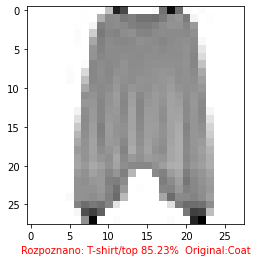

In [ ]:
plot_my_image(model_fashion,
                  x_test_fashion_norm,
                  y_test_fashion,
                  class_names)

##Jake paterny se nas model uci ? 

Na kazdy pixel (Jelikoz jsme udelali Flatten takze jsme rozlozili pixeli 28x28 do 1D array o 784) ma Dense layer 4 cisla coz vychazi na 3136 + 4 biases = 3140 learnable parametru. 

Coz je vlastne 4 neurony na pixel

Kazda matice vah (weights/paterns) se urcuje nahodne pomoci **kernel_initializer**

**bias_initializer** urcuje hodnoty biasu na zacatku uceni (v pripade TF dense layer je to plne nul- zeros) 

weights - nachazi slouzi modelu k najisti paternu rozpoznani obrazku/ predmetu/ cehokoliv

biases - urcuji jak moc by meli ovlivnit vahy nadchazejici vrstvu


In [ ]:
model_10_moda.layers

In [ ]:
#extrahovani jedne vrstvy
model_10_moda.layers[1]

In [ ]:
weights, biases = model_10_moda.layers[1].get_weights()
#random cisla black box pro nas pro stroj ne 
weights, weights.shape

(array([[-0.05659419,  0.66544706,  0.10069521, -0.18572944],
        [-0.69959736,  0.35598892,  0.4938323 ,  0.265323  ],
        [ 0.07590607, -0.4078018 , -0.13863423, -0.01684518],
        ...,
        [-0.04280764, -0.31221485, -1.0902393 , -0.10480627],
        [-0.24086803, -0.50313914, -0.96540487, -0.24938117],
        [ 0.10757992,  0.18352228, -0.8742191 , -0.27563214]],
       dtype=float32), (784, 4))

In [ ]:
784*4

3136

In [ ]:
model_10_moda.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_147 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_148 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Bias 

biases, biases.shape

(array([-0.60816765,  0.44272065, -0.437812  ,  0.96294105], dtype=float32),
 (4,))

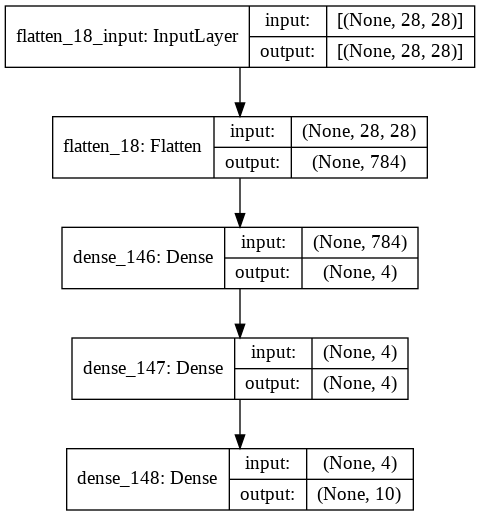

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_10_moda,show_shapes =True)

#Cviceni

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

cv_model_1 = tf.keras.models.Sequential([
                                         
                                         tf.keras.layers.Dense(6,activation="relu",input_shape=[2]),
                                         tf.keras.layers.Dense(6,activation="relu"),
                                         tf.keras.layers.Dense(6,activation="relu"),
                                         tf.keras.layers.Dense(6,activation="relu"),
                                         tf.keras.layers.Dense(6,activation="relu"),
                                         tf.keras.layers.Dense(1,activation="sigmoid")
])
cv_model_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

cv_model_1.build()


In [ ]:
cv_model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_58 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_59 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_60 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
cv_x,cv_y = make_moons(1000)

In [ ]:
cv_x[:10], cv_y[:10]

(array([[ 1.8818285 ,  0.02842976],
        [ 1.66003583, -0.25123412],
        [ 1.46879201, -0.38330858],
        [ 0.15291711, -0.0314608 ],
        [ 0.90257026, -0.49524241],
        [ 0.83689452,  0.54736419],
        [ 0.29400704, -0.20821885],
        [ 0.06150939,  0.15469524],
        [ 1.31260736, -0.44988243],
        [-0.78934399,  0.61395119]]), array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0]))

In [ ]:
import matplotlib.pyplot as plt


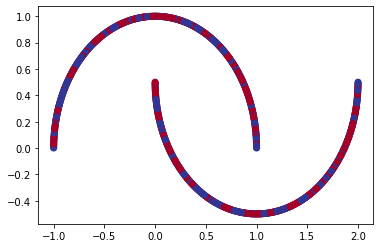

In [ ]:
plt.scatter(cv_x[:,0],cv_x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import numpy as np


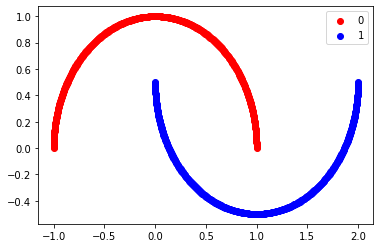

In [ ]:
cdic = {0: 'red', 1:'blue'}

fig, ax = plt.subplots()

for g in np.unique(cv_y):
  ix = np.where(cv_y == g)
  ax.scatter(cv_x[ix,0],cv_x[ix,1], c = cdic[g], label = g)
ax.legend()
plt.show()

In [ ]:
cv_x_train = cv_x[:800]
cv_y_train = cv_y[:800]

cv_x_test = cv_x[800:]
cv_y_test = cv_y[800:]

In [ ]:
cv_x_train.shape

(800, 2)

In [ ]:
tf.random.set_seed(42)

cv_model_2 = tf.keras.models.Sequential([
                                         tf.keras.layers.Dense(10, activation="relu"),
                                         tf.keras.layers.Dense(1,activation="sigmoid")
])

cv_model_2.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

cv_model_2.fit(cv_x_train,
               cv_y_train,
               epochs=100,
               validation_data=(cv_x_test,cv_y_test))

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 0.5103 - accuracy: 0.7275 - val_loss: 0.4197 - val_accuracy: 0.7950
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8562 - val_loss: 0.3317 - val_accuracy: 0.8350
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.8737 - val_loss: 0.2947 - val_accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.8850 - val_loss: 0.2651 - val_accuracy: 0.8850
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.8875 - val_loss: 0.2483 - val_accuracy: 0.8800
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9025 - val_loss: 0.2299 - val_accuracy: 0.8900
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.9038 - val_loss: 0.2151 - val_accuracy: 0.9050
Epoch 8/100
2

In [ ]:
cv_model_2.evaluate(cv_x_test,cv_y_test)

7/7 [==============================] - 0s 2ms/step - loss: 9.5864e-04 - accuracy: 1.0000


[0.0009586448431946337, 1.0]

Binary predikce


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'apltha'


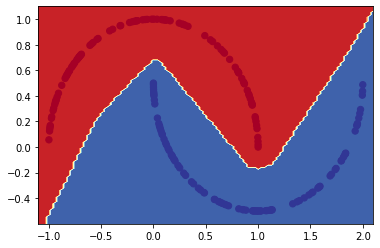

In [ ]:
plot_desision(cv_model_2,cv_x_test,cv_y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import numpy as np


In [ ]:
(x_train_fashion,y_train_fashion),(x_test_fashion,y_test_fashion) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train_fashion_norm = normalize(x_train_fashion)
x_test_fashion_norm = normalize(x_test_fashion)

Text(0.5, 0, 'Sandal')

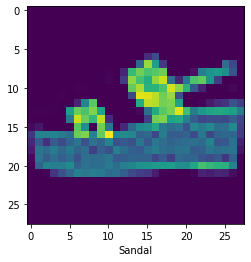

In [ ]:
i = 12
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress" ,"Coat", "Sandal", "Shirt" ,"Sneaker", "Bag", "Ankle boot"]
#plt.figure(label = y_train_fashion[i] )
plt.imshow(x_train_fashion[i])
plt.xlabel(class_names [y_train_fashion[i]])

In [ ]:
x_train_fashion_norm[0].shape

(28, 28)

In [ ]:
tf.random.set_seed(42)

model_fashion = tf.keras.models.Sequential([
                                            tf.keras.layers.Flatten(input_shape = (28,28)),
                                            tf.keras.layers.Dense(128,activation="relu"),
                                            tf.keras.layers.Dense(256,activation="relu"),
                                            tf.keras.layers.Dense(512,activation="relu"),
                                            tf.keras.layers.Dense(1024,activation="relu"),
                                            tf.keras.layers.Dense(10,activation="softmax")
])
model_fashion.compile(
    optimizer = tf.keras.optimizers.Adam(0.0015),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ["accuracy"]
)

model_fashion.fit(x_train_fashion_norm,
                  y_train_fashion,
                  epochs = 100,
                  validation_data = (x_test_fashion_norm,y_test_fashion))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4941 - accuracy: 0.8188 - val_loss: 0.4192 - val_accuracy: 0.8467
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8622 - val_loss: 0.4270 - val_accuracy: 0.8472
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3417 - accuracy: 0.8741 - val_loss: 0.3786 - val_accuracy: 0.8650
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3205 - accuracy: 0.8827 - val_loss: 0.3746 - val_accuracy: 0.8631
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.8874 - val_loss: 0.3706 - val_accuracy: 0.8699
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8903 - val_loss: 0.3881 - val_accuracy: 0.8598
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.8970 - val_loss: 0.3775 - val_ac

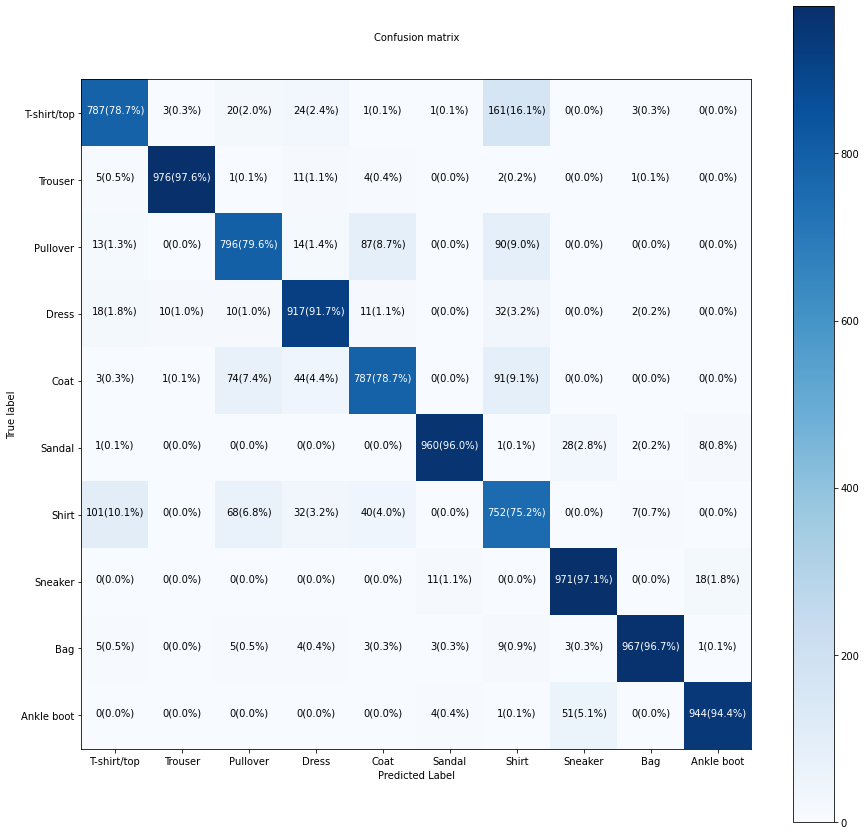

In [ ]:
y_probs_fashion = model_fashion.predict(x_test_fashion_norm)

y_probs_fashion[0]
y_pred_fashion = tf.argmax(y_probs_fashion,axis = 1)
y_pred_fashion[:10]

my_conf_matrix(y_test_fashion,y_pred_fashion,class_names,(15,15),10)

In [ ]:
#Udelani softmax funkce

def moje_softmax(x):
  """
  Funkce, ktera vezme Tensor x a aplikuje softmax, nasledne vrati Tensor
  """
  r = []
  r_m = []
  s = []
  for i in range(len(x)):
    s_m = 0
    for j in range(len(x[i])):
      s_m = s_m + tf.exp(x[i][j])
    s.append(s_m)

  index = 0
  for i in range(len(x)):
    for j in range(len(x[i])):
      r_m.append(tf.exp(x[i][j])/s[index])
    index+1
    r_m = np.array(r_m)
    r.append(r_m)  
    r_m = []

  r = np.array(r)
  r = tf.constant(r)
  return r


x = tf.constant([[2.0, 3.0, 4.0],
                 [5.0, 6.0, 4.2] 
                 ])

moje_softmax(x)
print("\n")
print(tf.nn.softmax(x))

[<tf.Tensor: shape=(), dtype=float32, numpy=0.09003058>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.09003058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24472849>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.09003058>, <tf.Tensor: shape=(), dtype=float32, numpy=0.24472849>, <tf.Tensor: shape=(), dtype=float32, numpy=0.66524094>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.8083125>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.8083125>, <tf.Tensor: shape=(), dtype=float32, numpy=4.915503>]
[<tf.Tensor: shape=(), dtype=float32, numpy=1.8083125>, <tf.Tensor: shape=(), dtype=float32, numpy=4.915503>, <tf.Tensor: shape=(), dtype=float32, numpy=0.812527>]
tf.Tensor(
[[0.09003058 0.24472849 0.66524094]
 [1.8083125  4.915503   0.812527  ]], shape=(2, 3), dtype=float32)


tf.Tensor(
[[0.09003057 0.24472848 0.6652409 ]
 [0.23994565 0.65223986 0.10781451]], shape=(2, 3), dtype=float32)


In [ ]:
x.shape
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2. , 3. , 4. ],
       [5. , 6. , 4.2]], dtype=float32)>

In [ ]:
test = [2,3]
for i in range(len(x)):
  for j in range(len(x[i])):
    print(j)


0
1
2
0
1
2


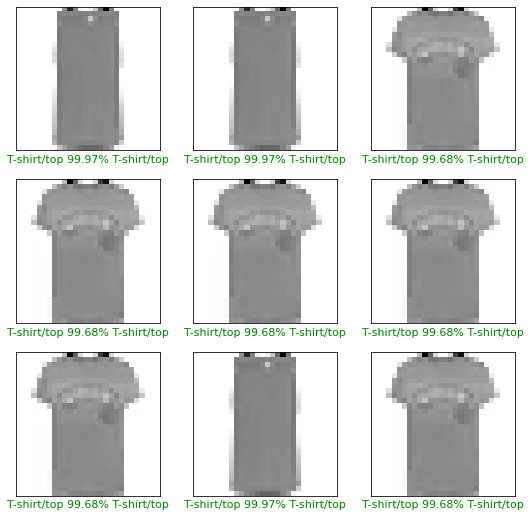

In [ ]:
num_cols = 3 
num_rows = 3
num_img = num_cols*num_rows
plt.figure(figsize=(3*num_cols,3*num_rows))

for i in range(num_img):
  plt.subplot(num_rows,num_cols,i+1)
  plot_my_image(model_fashion,x_test_fashion_norm,y_test_fashion,class_names,random_image=True,n=i,text_size=11,by_class=True,index_of_class=0)